In [191]:
import matplotlib.pyplot as plt
import os
import json

In [192]:
# TODO: modify work dir in 'expr'
work_dir = 'expr_car_schedule_unnetlimit'


In [193]:
source_data = []

for i in range(3):
    source_data_path = os.path.join(work_dir, f'data_record_source_{i}.json')
    with open(source_data_path, 'r') as file:
        source_data.append(json.load(file))

color = ['#2878b5',
'#f8ac8c',
'#c82423']

In [194]:
# car num of data source
obj_num_list = [[], [], []]
obj_size_list = [[], [], []]
for i in range(3):
    for key in sorted(source_data[i], key= lambda i:int(i)):
        print(key)
        task = source_data[i][key]
        obj_num_list[i].append(task['obj_num'])
        obj_size_list[i].append(task['obj_size']/100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44

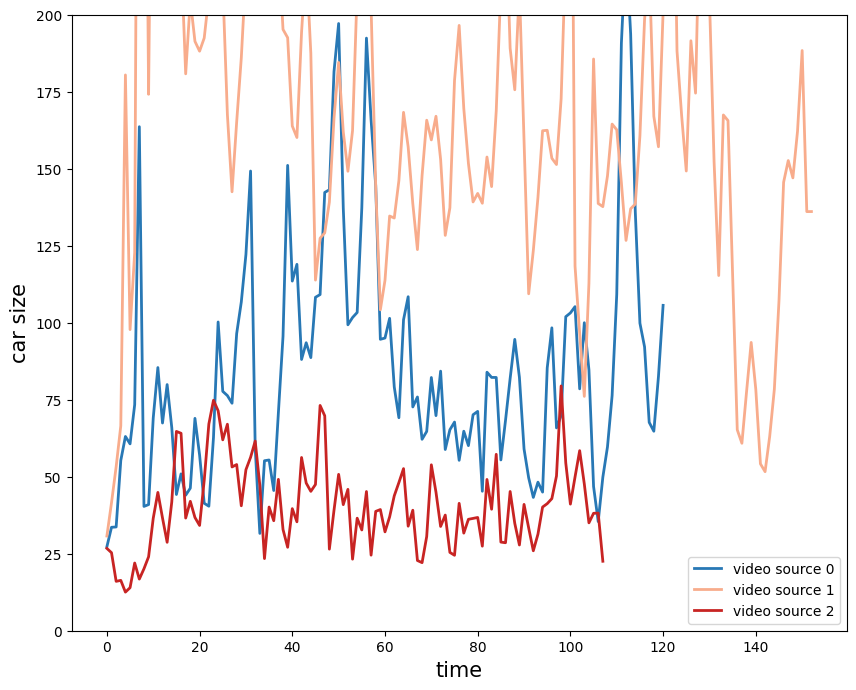

In [195]:
plt.figure(figsize=(10,8))
plt.xlabel('time', fontsize=15)
plt.ylabel('car size', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i in range(3):
    plt.plot(obj_size_list[i], color=color[i],linewidth=2, label=f'video source {i}')

plt.ylim(0, 200)
plt.legend()

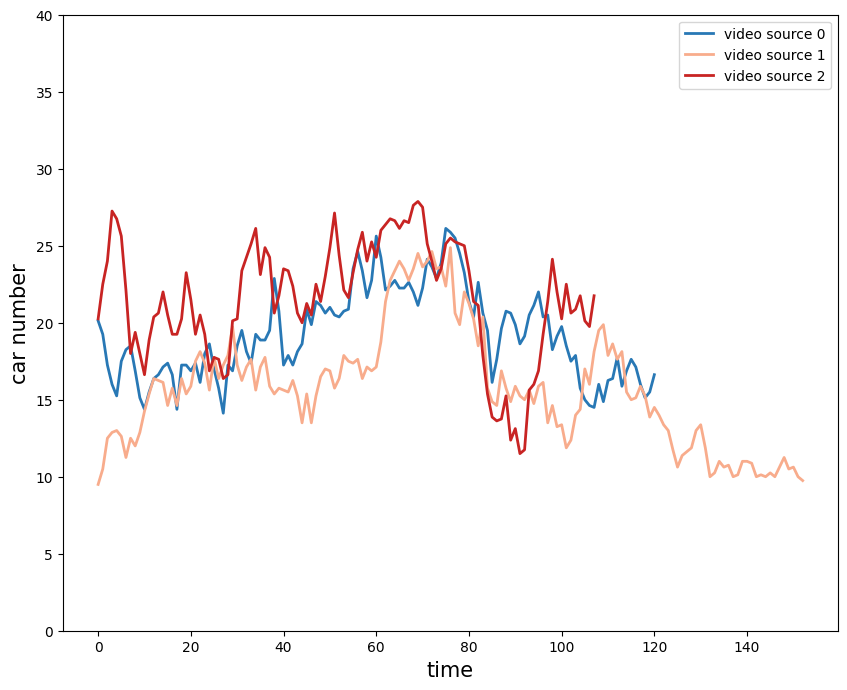

In [196]:
plt.figure(figsize=(10,8))
plt.xlabel('time', fontsize=15)
plt.ylabel('car number', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i in range(3):
    plt.plot(obj_num_list[i], color=color[i],linewidth=2, label=f'video source {i}')

plt.ylim(0, 40)
plt.legend()

In [197]:
# total time
def calculate_total_time(pipeline):
        latency = 0
        for task in pipeline:
            latency += task['execute_data']['transmit_time']
            if task['service_name'] != 'end':
                latency += task['execute_data']['service_time']
        return latency

In [198]:
total_latency = [[], [], []]

for i in range(3):
    for key in source_data[i]:
        task = source_data[i][key]
        latency = calculate_total_time(task['pipeline'])
        meta_data = task['meta_data']
        latency = latency/int(meta_data['frame_number']*meta_data['fps_raw']/meta_data['fps'])
        total_latency[i].append(latency)

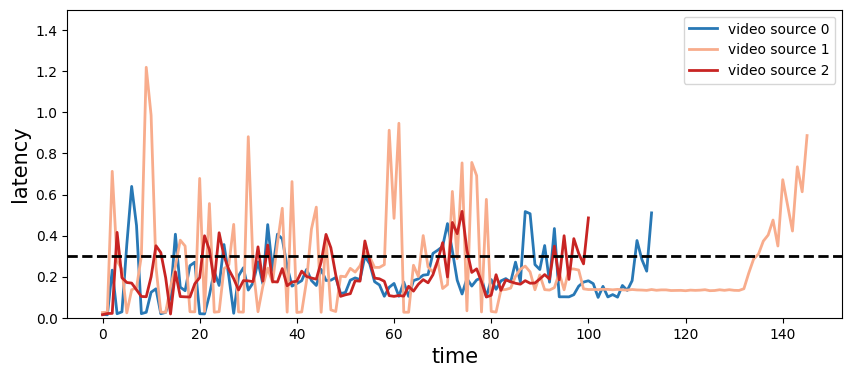

In [199]:
plt.figure(figsize=(10,4))
plt.xlabel('time', fontsize=15)
plt.ylabel('latency', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i in range(3):
    plt.plot(total_latency[i][7:], color=color[i], linewidth=2, label=f'video source {i}')

plt.axhline(y=0.3, color='black', linestyle='--', linewidth=2)
plt.ylim(0,1.5)
plt.legend()

In [200]:
import re
def extract_ip_from_address(address):
    ip_pattern = r"https?:\/\/([\d\.]+):\d+"
    ip_match = re.search(ip_pattern, address)
    return ip_match.group(1) if ip_match else None

In [201]:
# configuration
position_dict = {'114.212.81.11':'cloud', '192.168.1.2':'edge'}
resolution = [[], [], []]
fps = [[], [], []]
position = [[], [], []]
for i in range(3):
    for key in source_data[i]:
        task = source_data[i][key]
        meta_data = task['meta_data']
        pipeline = task['pipeline']
        resolution[i].append(meta_data['resolution'])
        fps[i].append(meta_data['fps'])
        position[i].append(position_dict[extract_ip_from_address(pipeline[0]['execute_address'])])

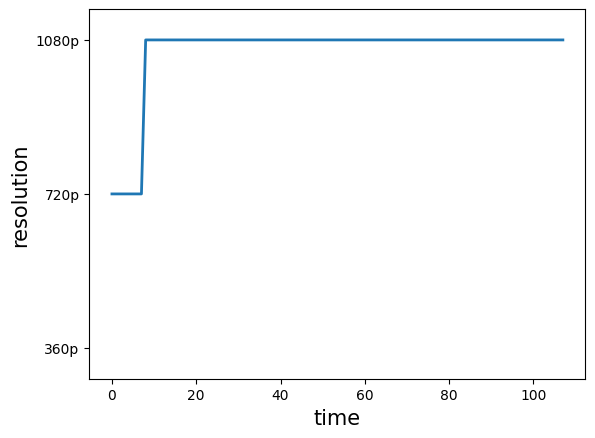

In [223]:
data_source_index = 2
res_dict = {'360p':0, '720p':1, '1080p':2}
# plt.figure(figsize=(10,8))
plt.xlabel('time', fontsize=15)
plt.ylabel('resolution', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks([0,1,2],['360p', '720p', '1080p'],fontsize=10)

plt.ylim(-0.2,2.2)
plt.plot([res_dict[i] for i in resolution[data_source_index]], linewidth=2)



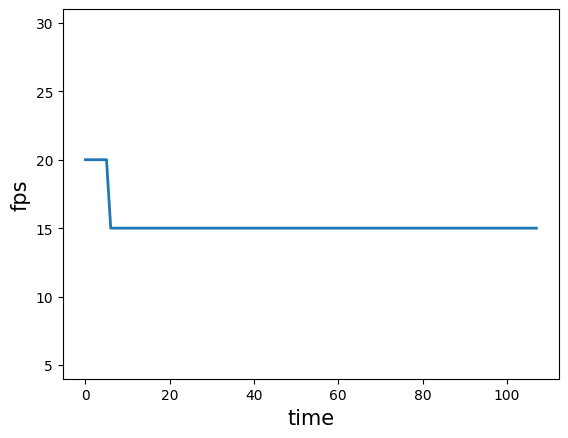

In [224]:
# plt.figure(figsize=(10,8))
plt.xlabel('time', fontsize=15)
plt.ylabel('fps', fontsize=15)
plt.xticks(fontsize=10)

plt.yticks([5, 10, 15, 20, 25, 30], fontsize=10)
plt.ylim(4,31)
plt.plot(fps[data_source_index], linewidth=2)


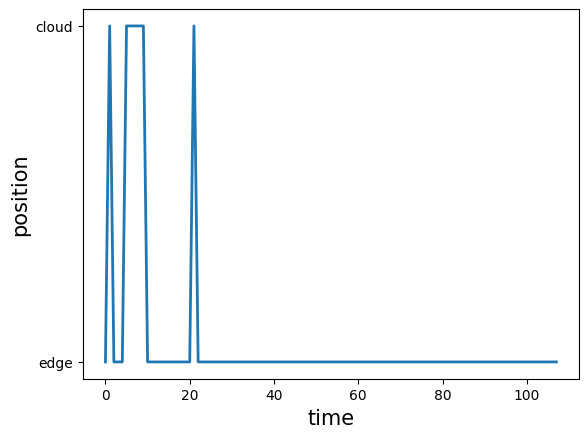

In [225]:
# plt.figure(figsize=(10,8))
plt.xlabel('time', fontsize=15)
plt.ylabel('position', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.plot(position[data_source_index], linewidth=2)
